In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [97]:
sys.path.append("../environment")
sys.path.append("../agent/")

from market_env import HFTMarketEnvironment
from baseline_agent import FixedOffsetMMAgent
from deep_q_agent import DQLAgent

In [4]:
def read_rl_data(date):
    data_path = "../rl_data"
    with open(f"{data_path}/bid_ask/{date}.pickle", 'rb') as f:
        ba = pickle.load(f)
    with open(f"{data_path}/last_trade/{date}.pickle", 'rb') as f:
        lt = pickle.load(f)
    return ba, lt

# Data

In [5]:
ba, lt = read_rl_data("2024-01-08")

# Environment

In [78]:
params = {
    "bid_ask": ba,
    "trades": lt,
    "balance": {"BTC": 0, "FDUSD": 10000},
    "cancel_frequency": 10
}

env = HFTMarketEnvironment(params)

# Fixed Offset Agent

In [79]:
agent = FixedOffsetMMAgent(quantity=0.005, price_delta=0)

In [80]:
rewards = agent.exploit(env)

In [81]:
rewards

-3204.9516499996944

# Rewards (pnl)

In [68]:
pnl_df = pd.DataFrame(env.pnl)
pnl_df["realized_pnl_cum"] = pnl_df["realized_pnl"].cumsum()

<Axes: >

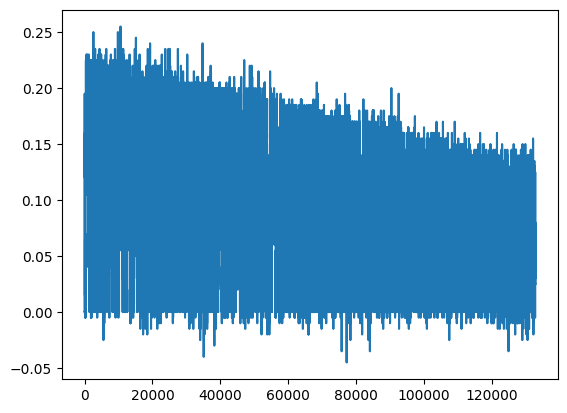

In [73]:
pnl_df["inventory"].plot()

<Axes: >

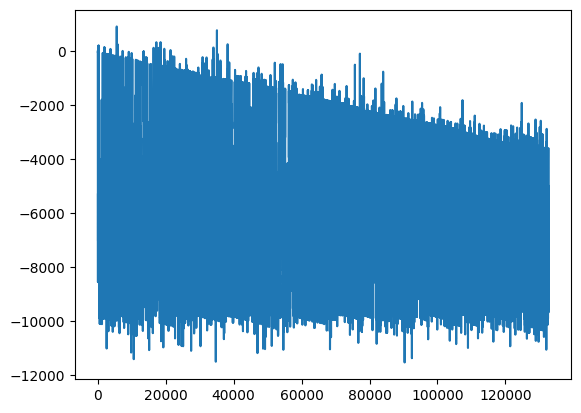

In [74]:
pnl_df["cash_balance"].plot()

# Deep q agent

In [186]:
params = {
    "bid_ask": ba,
    "trades": lt,
    "balance": {"BTC": 0, "FDUSD": 10000},
    "cancel_frequency": 10
}

env = HFTMarketEnvironment(params)

In [189]:
dql_agent = DQLAgent(
    state_dim=39, 
    lr=5e-4,
    gamma=0.99,
    epsilon=1.0,
    epsilon_decay=0.999,
    epsilon_min=0.01,
    batch_size=256,
    memory_size=10000
)

In [190]:
train_rewards = dql_agent.train(env, num_episodes=1)

  0%|          | 0/1 [00:00<?, ?it/s]

Episode: 1/1, Total Reward: -3135.84629999995


In [191]:
exploit_rewards = dql_agent.exploit(env, num_episodes=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Exploit Episode: 1/10, Total Reward: 0
Exploit Episode: 2/10, Total Reward: 0


KeyboardInterrupt: 